Lesson 8-1
==
Визуализация с помощью seaborn
===
 Общий синтаксис и исследования распределений.
--
```
pip install seaborn
```

In [44]:
import seaborn as sns
import numpy as np
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt

<Axes: ylabel='Count'>

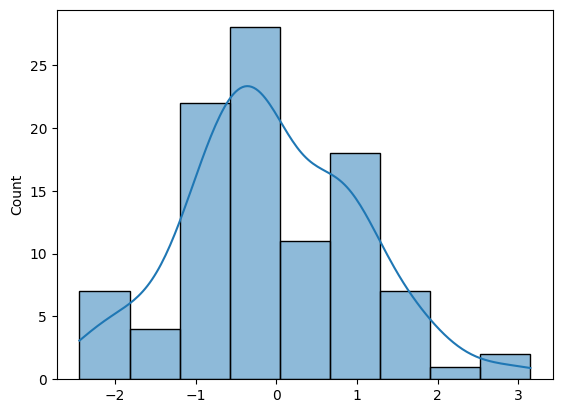

In [7]:
#histplot
x = np.random.randn(100)
sns.histplot(x, kde=True)


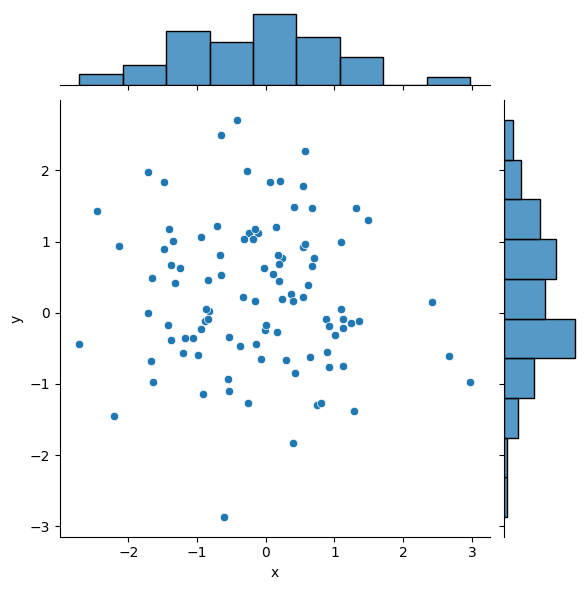

In [10]:
#jointplot
data = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})
sns.jointplot(x='x', y='y', data=data, kind='scatter')


In [16]:
tips = sns.load_dataset("tips")

<Axes: xlabel='total_bill', ylabel='tip'>

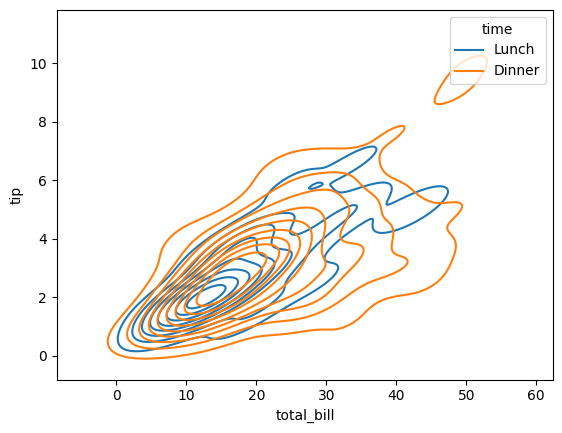

In [17]:
#kdeplot
sns.kdeplot(data=tips, x="total_bill", y="tip", hue="time")


<Axes: xlabel='day', ylabel='total_bill'>

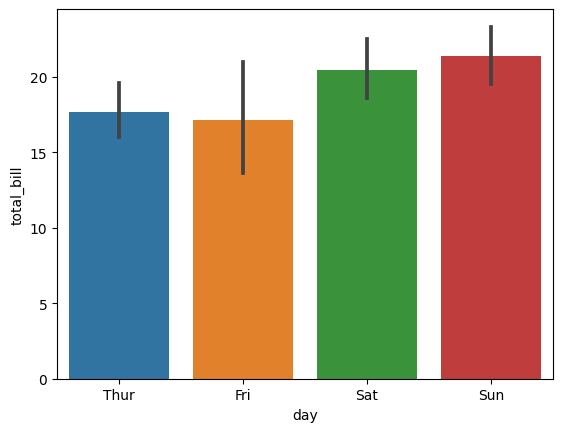

In [18]:
#barplot
sns.barplot(x="day", y="total_bill", data=tips)


<Axes: xlabel='day', ylabel='total_bill'>

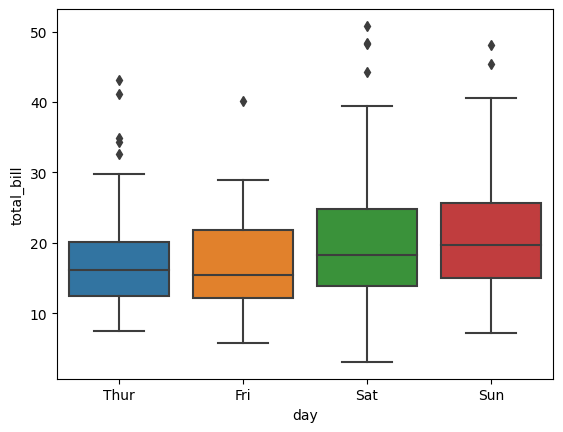

In [19]:
#boxplot
sns.boxplot(x="day", y="total_bill", data=tips)


Взаимосвязи между данными.
---

<Axes: xlabel='total_bill', ylabel='tip'>

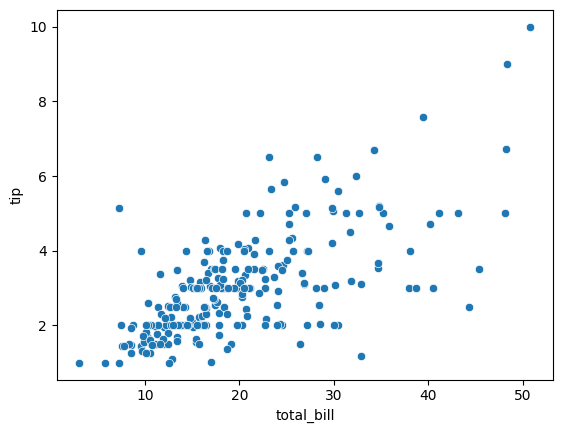

In [20]:
#scatterplot
sns.scatterplot(x="total_bill", y="tip", data=tips)


<Axes: xlabel='total_bill', ylabel='tip'>

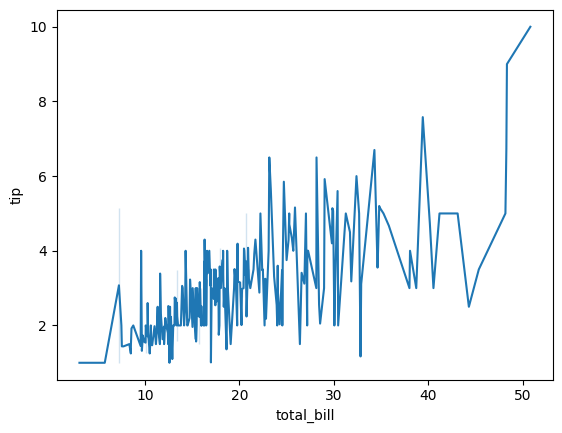

In [21]:
#lineplot
sns.lineplot(x="total_bill", y="tip", data=tips)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


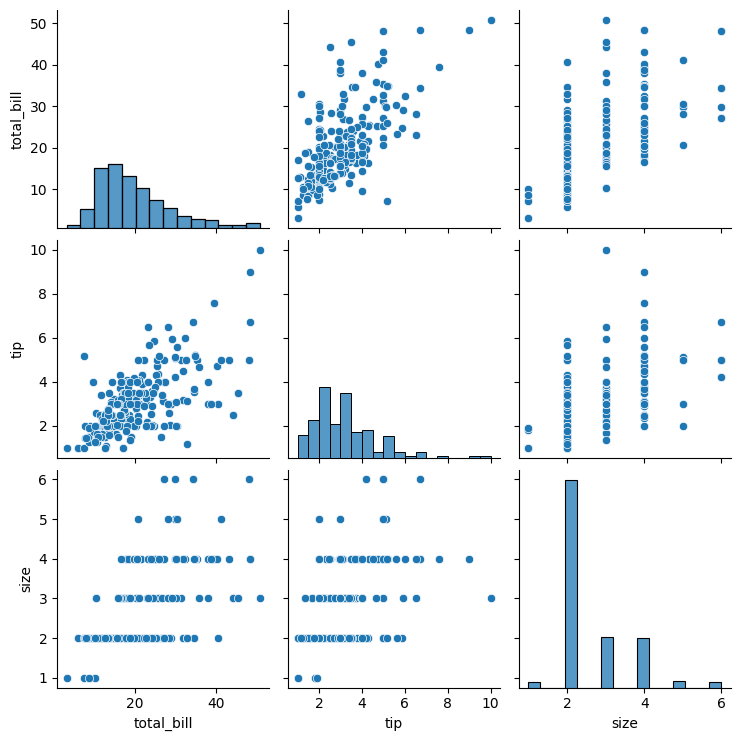

In [22]:
#pairplot
sns.pairplot(tips)


In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

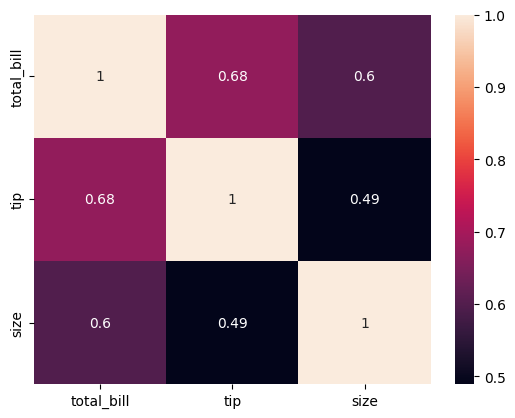

In [26]:
#heatmap
corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True)


Регрессионный анализ.
--

<Axes: xlabel='total_bill', ylabel='tip'>

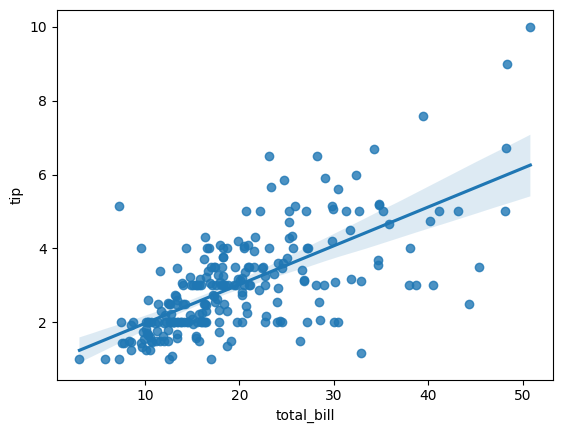

In [27]:
sns.regplot(x="total_bill", y="tip", data=tips)


Структурирование многомерных наборов данных.
--

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


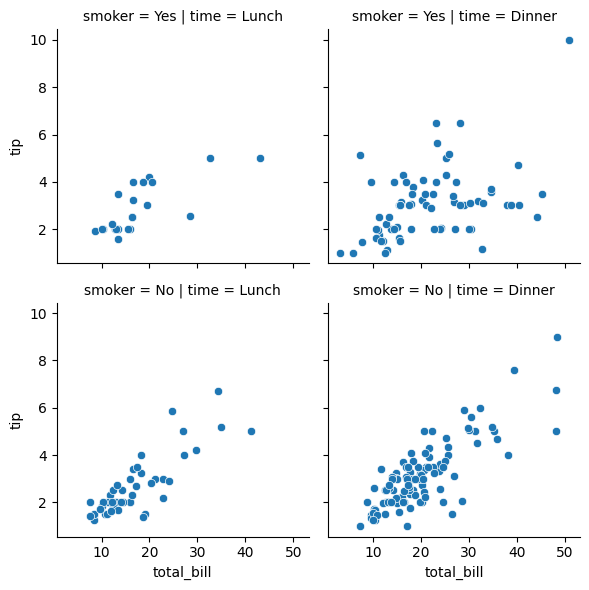

In [30]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(sns.scatterplot, "total_bill", "tip")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


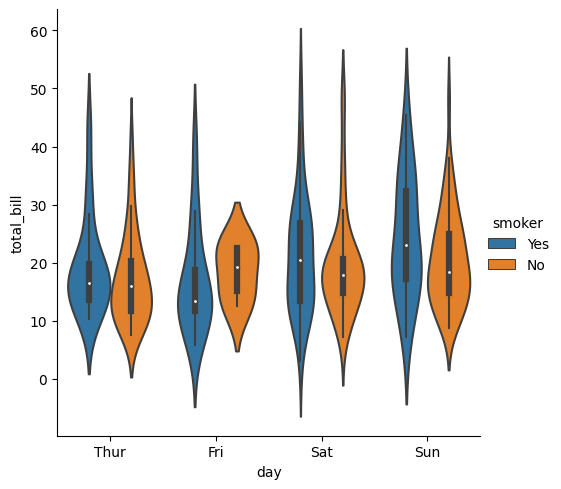

In [31]:
#Визуализация категориальных взаимодействий.
sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", data=tips)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


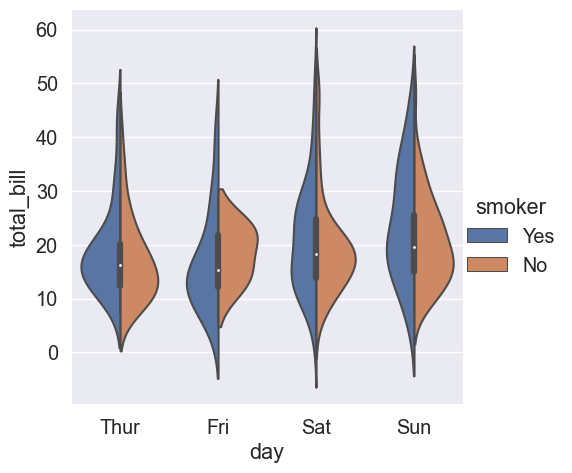

In [101]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", data=tips, split=True)

Настройка стилей.
--

In [32]:
sns.set_style("whitegrid")
sns.set_context("talk")


In [33]:
#Кастомизация тем и стилей.
sns.set_theme(style="darkgrid")


Работа с палитрами цветов.
--

In [34]:
sns.set_palette("pastel")


Используемую палитру можно визуализировать с помощью функции ```sns.palplot```. Палитры делятся на несколько следующих типов.

**Последовательные (sequential)**

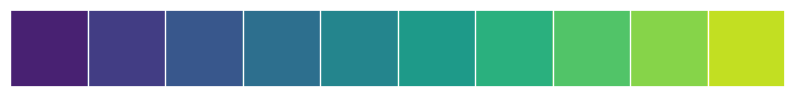

In [35]:
sns.palplot(sns.color_palette('viridis', n_colors=10))



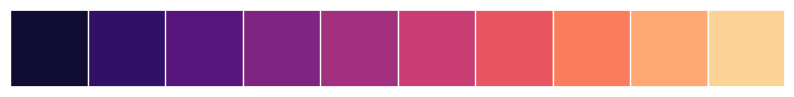

In [36]:
sns.palplot(sns.color_palette('magma', n_colors=10))


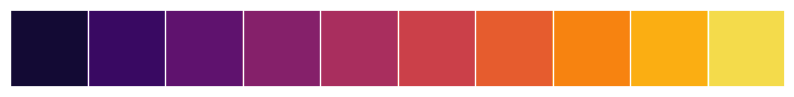

In [37]:
sns.palplot(sns.color_palette('inferno', n_colors=10))

**Расходящиеся (diverging)**

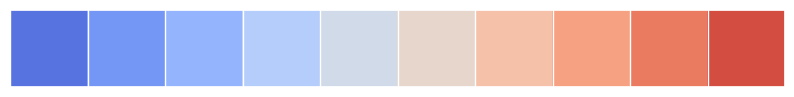

In [38]:
sns.palplot(sns.color_palette('coolwarm', n_colors=10))


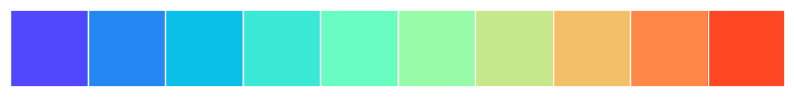

In [39]:
sns.palplot(sns.color_palette('rainbow', n_colors=10))


**Категориальные (qualitative)**

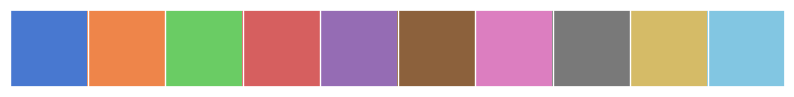

In [40]:
sns.palplot(sns.color_palette('muted', n_colors=10))


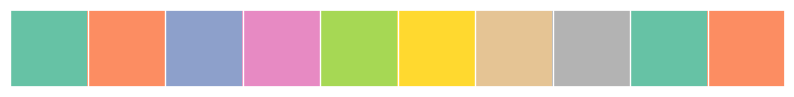

In [41]:
sns.palplot(sns.color_palette('Set2', n_colors=10))


Установка эстетических параметров графиков:
---

In [42]:
#sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)


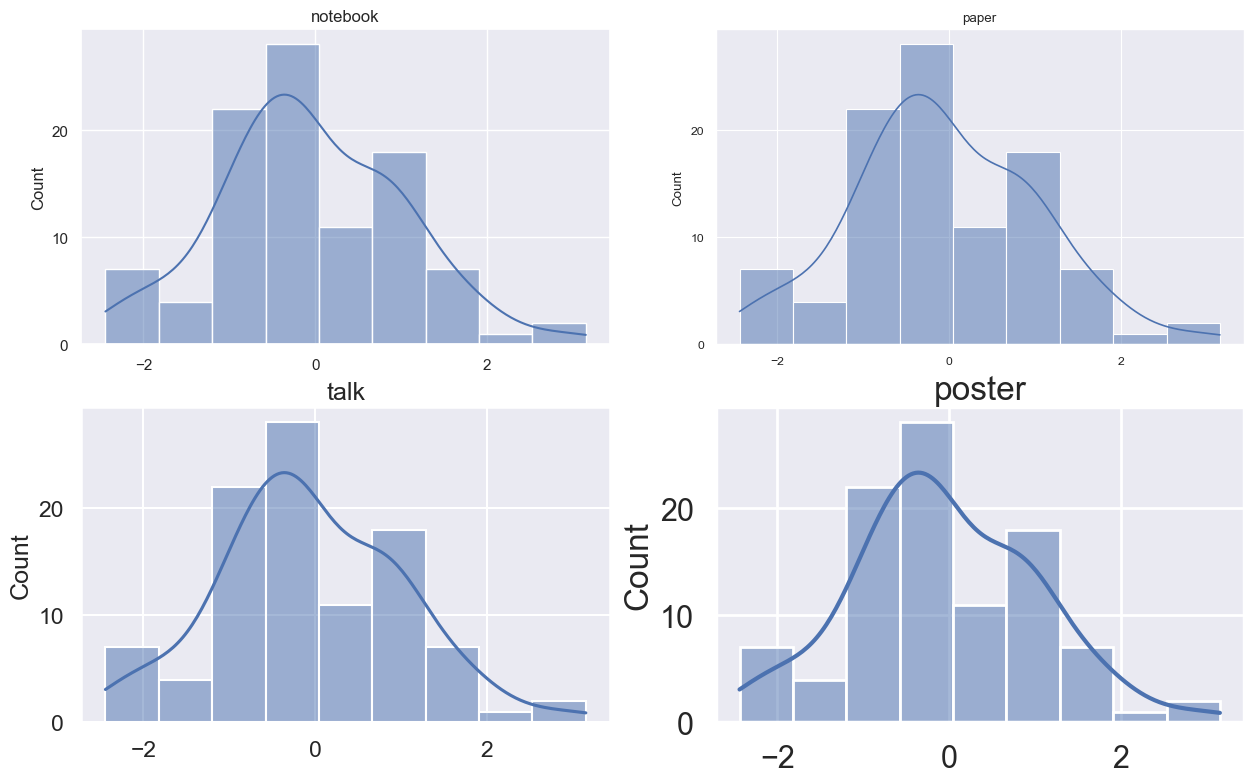

In [46]:
plt.figure(figsize=(15, 9))
for i, context in enumerate(['notebook', 'paper', 'talk', 'poster']):
    sns.set(context=context)  # Устанавливаем стиль
    plt.subplot(2, 2, i+1)
    sns.histplot(x, kde=True)
    plt.title(context)


In [50]:
#можно убрать рамку
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)


<Figure size 640x480 with 0 Axes>

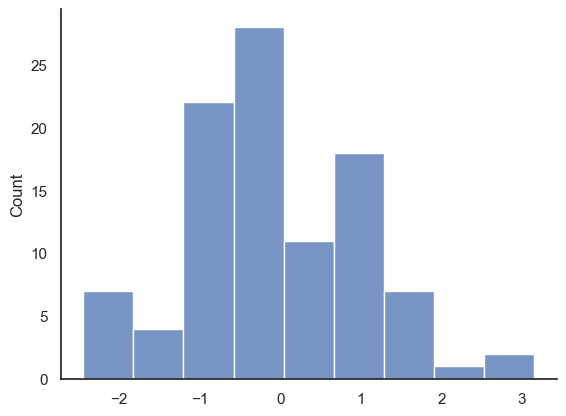

In [51]:
sns.set(style='white')
sns.histplot(x)
sns.despine()


 Использование Seaborn с Matplotlib.
--

Text(0.5, 1.0, 'Scatterplot in Matplotlib Figure')

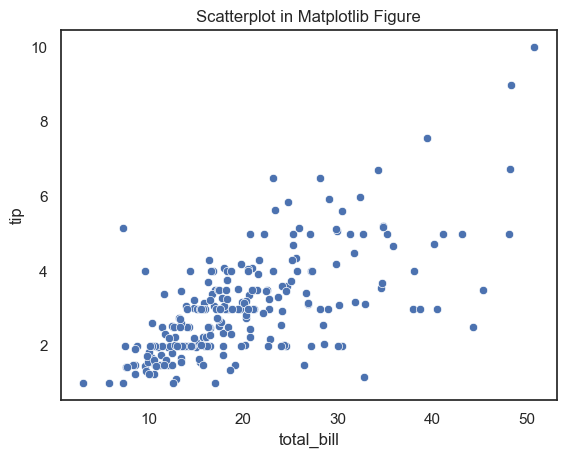

In [52]:
fig, ax = plt.subplots()
sns.scatterplot(x="total_bill", y="tip", ax=ax, data=tips)
ax.set_title("Scatterplot in Matplotlib Figure")


 Решение задач
 ---
1. Рассмотрим датасет "Ирисы Фишера". Этот датасет содержит информацию о 150 экземплярах ириса, разделенных на три вида: Setosa, Versicolor и Virginica. Для каждого экземпляра ириса зарегистрированы четыре атрибута: длина и ширина чашелистика, длина и ширина лепестка. Визуализируйте распределение длины лепестков


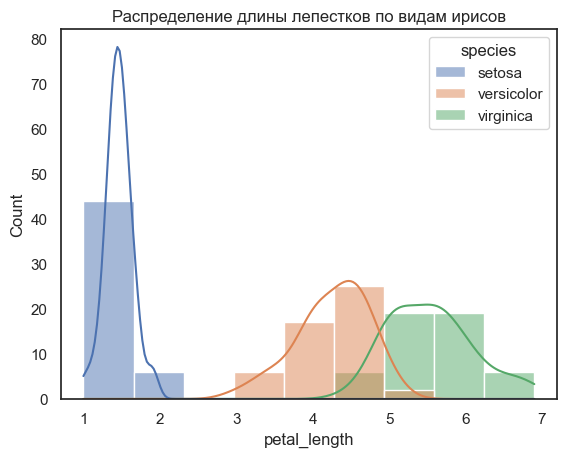

In [53]:
iris = sns.load_dataset("iris")
sns.histplot(data=iris, x="petal_length", hue="species", kde=True)
plt.title("Распределение длины лепестков по видам ирисов")
plt.show()


2. Сравните длины и ширины чашелистика с использованием scatterplot


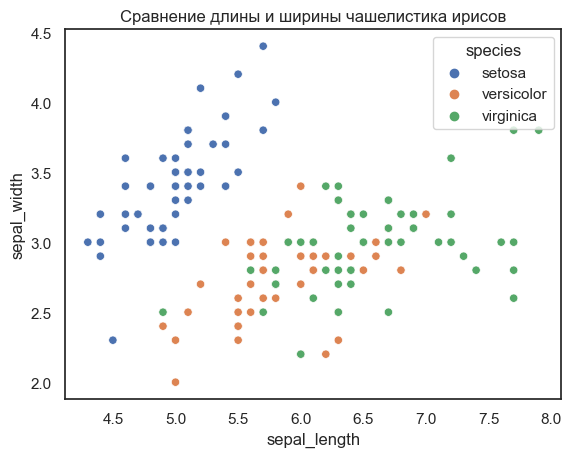

In [54]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
plt.title("Сравнение длины и ширины чашелистика ирисов")
plt.show()


Lesson 8-2
===
Продвинутые возможности seaborn
----


In [55]:
import scipy.stats as sps

In [60]:
sns.set_style('darkgrid')

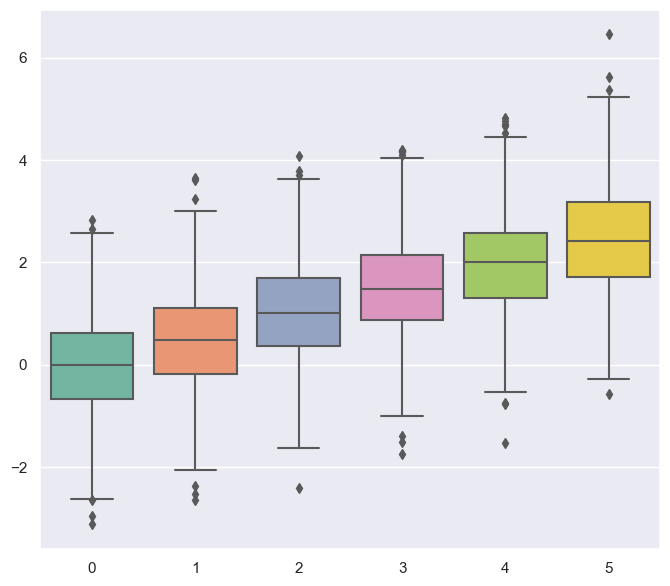

In [61]:
#boxplot
data = sps.norm.rvs(size=(1000, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.boxplot(data=data, palette='Set2');


Пример анализа данных. Box plot
--

In [62]:
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


С помощью box plot визуализируем зависимость общей суммы счета от дня недели.


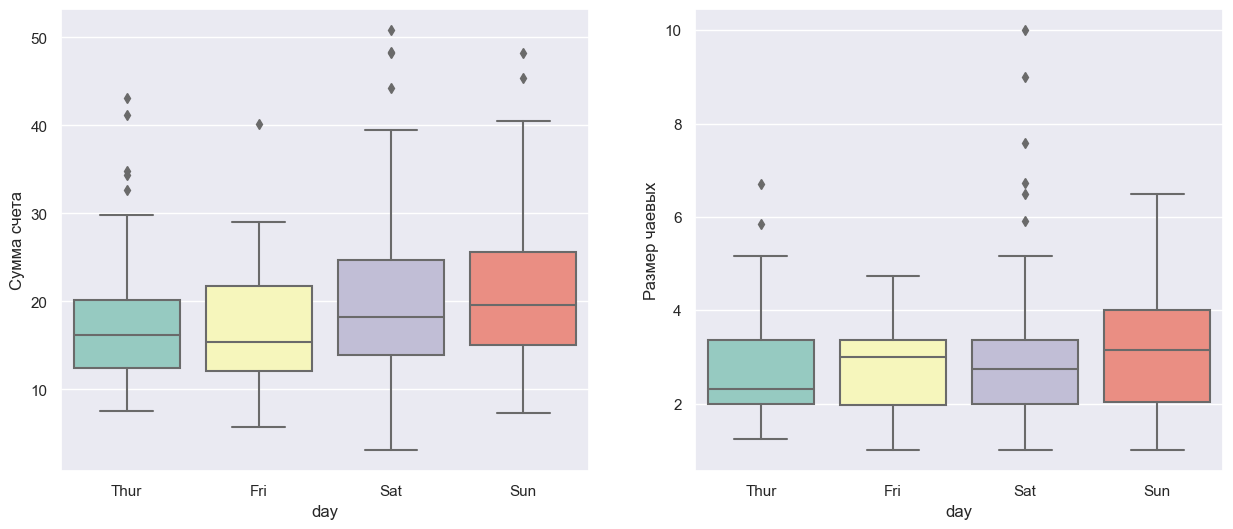

In [63]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3')
plt.ylabel('Сумма счета')

plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')
plt.ylabel('Размер чаевых');


Посмотрим на ту же зависимость отдельно по двум группам, определяемых столбцом smoker, который передадим в аргумент hue.

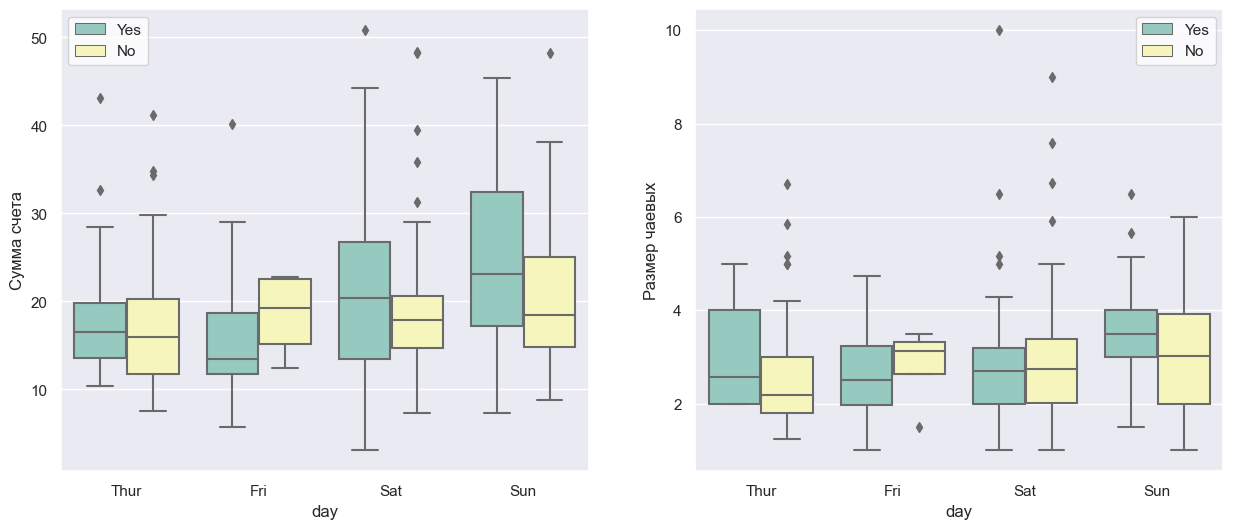

In [64]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='smoker', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');


Теперь посмотрим на зависимость от пола:


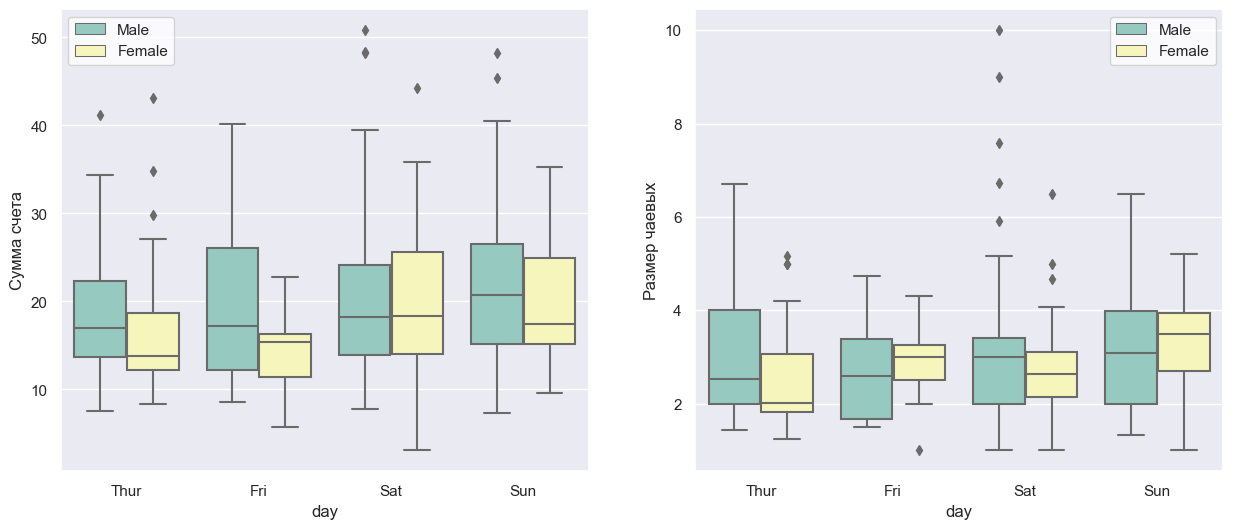

In [70]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='sex', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='sex', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых')
plt.show()


Violin plot
==
Некоторая комбинация boxplot и ядерной оценки плотности. Внутри облака изображен обычный ящик с усами, только в сжатом виде и без выбросов. Форма облака соответствует ядерной оценке плотности.

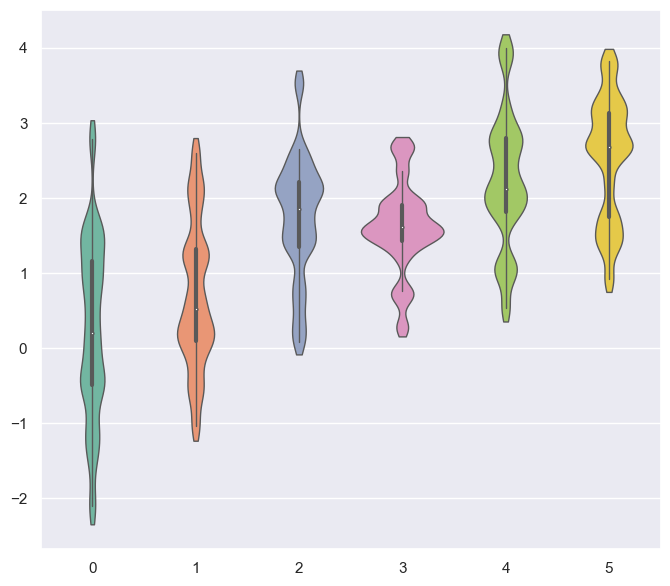

In [71]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(8, 7))
sns.violinplot(data=data, palette='Set2', bw=.2, cut=1, linewidth=1);


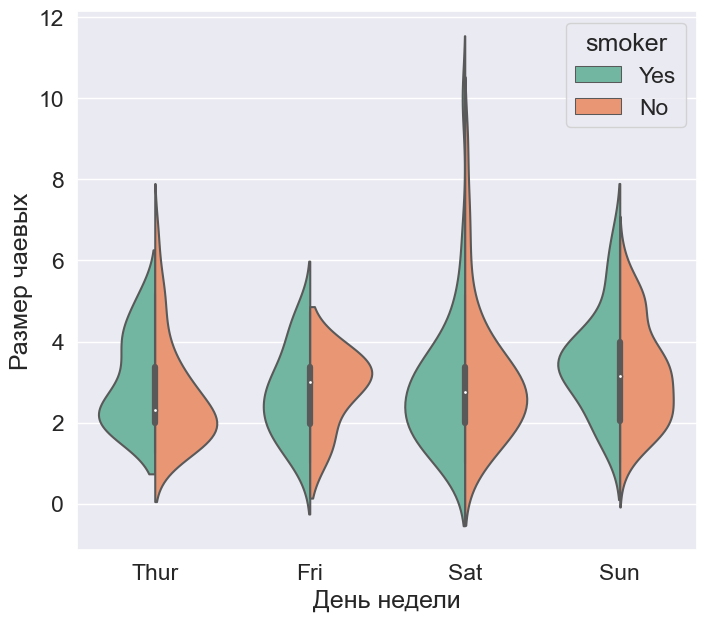

In [72]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 7))
    sns.violinplot(x="day", y="tip", hue="smoker",
                   data=tips, palette="Set2", split=True);
    plt.ylabel('Размер чаевых');
    plt.xlabel('День недели');


Heatmap
--

In [73]:
flights_long = sns.load_dataset('flights')
flights_long.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [74]:
flights = flights_long.pivot_table(index='month', 
                                   columns='year', 
                                   values='passengers')
flights


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


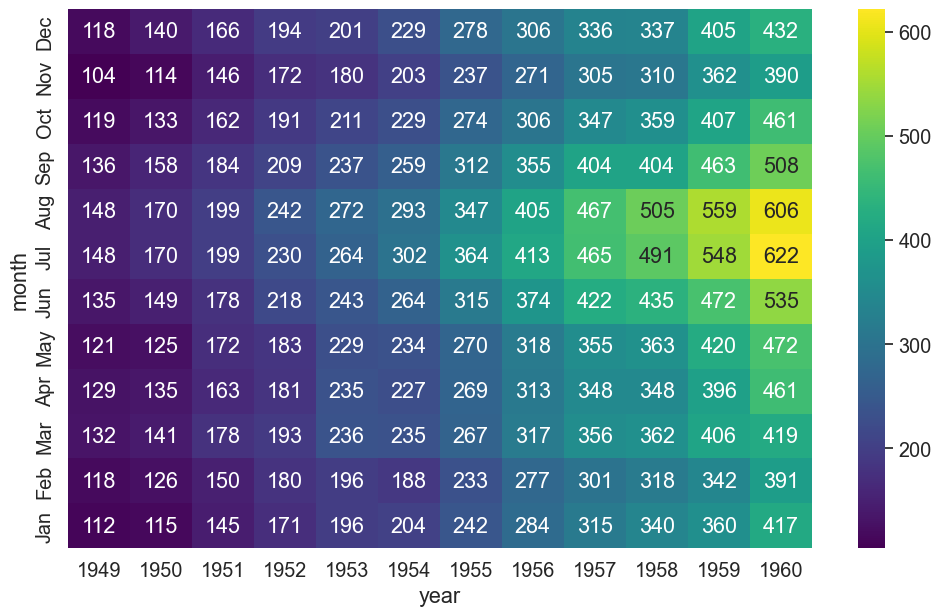

In [76]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(flights, annot=True, fmt='d', ax=ax, cmap="viridis")
plt.ylim((0, 12));


Clustermap
--
Аналог sns.heatmap, который автоматически группирует похожие строки и/или столбцы таблицы. Бывает очень полезно в тех случаях, когда нужно найти структуру в данных — скажем, разбить объекты на группы.


In [77]:

data = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
data

network           1                     2                     3             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1         55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219  -3.670537   1.442261 -19.680431 -29.109356   
916      -33.554138 -38.605621 -25.664803 -30.252352   5.562785  20.182186   
917      -78.539566 -74.197189 -54.041595 -39.970291 -14.277059 -30.606461   
918     -103.235825 -98.744286 -40.109543 -44.907734  12.109148   1.621340   
919      -36.288868 -10.762070 -30.356262 -23.319504  14.252188 -27.559860   

network          4                     5             ...          16  \
node             1                     1             ...           3   
hemi            lh         rh         lh         rh  ...          rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...    0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...   57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...   28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...   71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...   95.597565   
..             ...        ...        ...        ...  ...         ...   
915      -3.376562  -8.764893   0.017912 -25.305094  ...   58.285793   
916      17.911247  24.653582 -32.935612 -21.783203  ...   59.864819   
917      60.628521  62.027023 -32.800556 -37.021500  ...   68.767868   
918      33.765560  55.356071 -14.330512 -17.224781  ...  103.155251   
919      17.279512 -19.060152  26.558777  21.377319  ...  102.086304   

network                                 17                                   \
node              4                      1                     2              
hemi             lh          rh         lh         rh         lh         rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   
..              ...         ...        ...        ...        ...        ...   
915       68.557411   22.833048  76.179489  51.934669  -6.614513  -6.690762   
916       23.004578    7.657463  50.962399  13.696922  63.503616  57.401176   
917       49.664017   64.551498  43.800747   8.144480  47.281460  70.499649   
918      106.454849    9.046827  46.674419  40.954796   0.877180  37.577152   
919       80.051140   -2.642610 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 62 columns]

In [78]:
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (data.columns.get_level_values("network")
                            .astype(int)
                            .isin(used_networks))
data = data.loc[:, used_columns]
data

network           1                     5                     6             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1         55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2         60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3         18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4         -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219   0.017912 -25.305094 -75.461159 -70.289261   
916      -33.554138 -38.605621 -32.935612 -21.783203 -16.198238 -34.893780   
917      -78.539566 -74.197189 -32.800556 -37.021500   2.098941 -18.581594   
918     -103.235825 -98.744286 -14.330512 -17.224781  -3.007454 -42.672840   
919      -36.288868 -10.762070  26.558777  21.377319   9.652065  12.693388   

network                                7             ...         13  \
node             2                     1             ...          2   
hemi            lh         rh         lh         rh  ...         rh   
0       -47.664265  12.284122   1.566538 -13.042585  ...  14.738475   
1        10.269546  31.275831 -26.309488 -18.077026  ...  23.792282   
2        -5.314236   2.372976  -7.342168 -24.550989  ...   8.968520   
3        32.634335  45.825409 -47.632999  -6.580215  ...  19.627728   
4       -33.975418 -24.149668  -6.315651 -29.344135  ...  55.853088   
..             ...        ...        ...        ...  ...        ...   
915     -13.119029  -5.194376 -56.022263 -24.290606  ... -19.436220   
916      16.504656  13.005379  26.230785   4.764211  ...  16.711153   
917      11.386637   3.676295  52.871113  -3.970096  ...  45.261150   
918       1.581095 -38.023777  37.736561   4.872248  ...  33.483253   
919     -24.773617 -62.247086  -4.883728 -49.077343  ...  -8.466401   

network                               17                                   \
node             3          4          1                     2              
hemi            rh         rh         lh         rh         lh         rh   
0       -16.853010 -34.217819 -21.734550   1.028253   7.791784  68.903725   
1         8.927007 -19.732401 -13.035799  46.381824 -15.752450  31.000332   
2         1.413584  -4.955075  26.033442  34.212200   1.326110 -22.580757   
3        49.208748   1.661293  55.297466   4.255006  -2.420144  12.098393   
4        46.737320   4.586625  43.067562  52.219875  28.232882 -11.719750   
..             ...        ...        ...        ...        ...        ...   
915      15.894722  22.195951  76.179489  51.934669  -6.614513  -6.690762   
916      17.339653  13.682954  50.962399  13.696922  63.503616  57.401176   
917      37.007389  29.753304  43.800747   8.144480  47.281460  70.499649   
918      37.434860 -14.403917  46.674419  40.954796   0.877180  37.577152   
919      23.855883  48.888733 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 38 columns]

In [79]:
# создадим для них категориальную палитру 
network_pal = sns.husl_palette(len(used_networks), s=.45) # s - saturation 
network_lut = dict(zip(map(str, used_networks), network_pal))
network_lut

{'1': (0.8167028311697733, 0.5345122109266688, 0.5750280113923723),
 '5': (0.7256380093027939, 0.5865684184445076, 0.45124969098702544),
 '6': (0.601243246823196, 0.6281411529879642, 0.44959498566071004),
 '7': (0.4542447259142938, 0.6576596537208662, 0.5136454208930035),
 '8': (0.46712078684915886, 0.6454760674453914, 0.6277122757100324),
 '12': (0.47926472337389664, 0.6333002959568218, 0.7177878822401069),
 '13': (0.6254162090818173, 0.5854245228463807, 0.7893617517727602),
 '17': (0.7949032004362239, 0.5232533686100532, 0.7424428586524288)}

In [80]:
network_pal

[(0.8167028311697733, 0.5345122109266688, 0.5750280113923723),
 (0.7256380093027939, 0.5865684184445076, 0.45124969098702544),
 (0.601243246823196, 0.6281411529879642, 0.44959498566071004),
 (0.4542447259142938, 0.6576596537208662, 0.5136454208930035),
 (0.46712078684915886, 0.6454760674453914, 0.6277122757100324),
 (0.47926472337389664, 0.6333002959568218, 0.7177878822401069),
 (0.6254162090818173, 0.5854245228463807, 0.7893617517727602),
 (0.7949032004362239, 0.5232533686100532, 0.7424428586524288)]

In [81]:
# окрасим строки и столбцы в соответствии с отделом
networks = data.columns.get_level_values("network")
network_colors = pd.Series(networks, index=data.columns).map(network_lut)


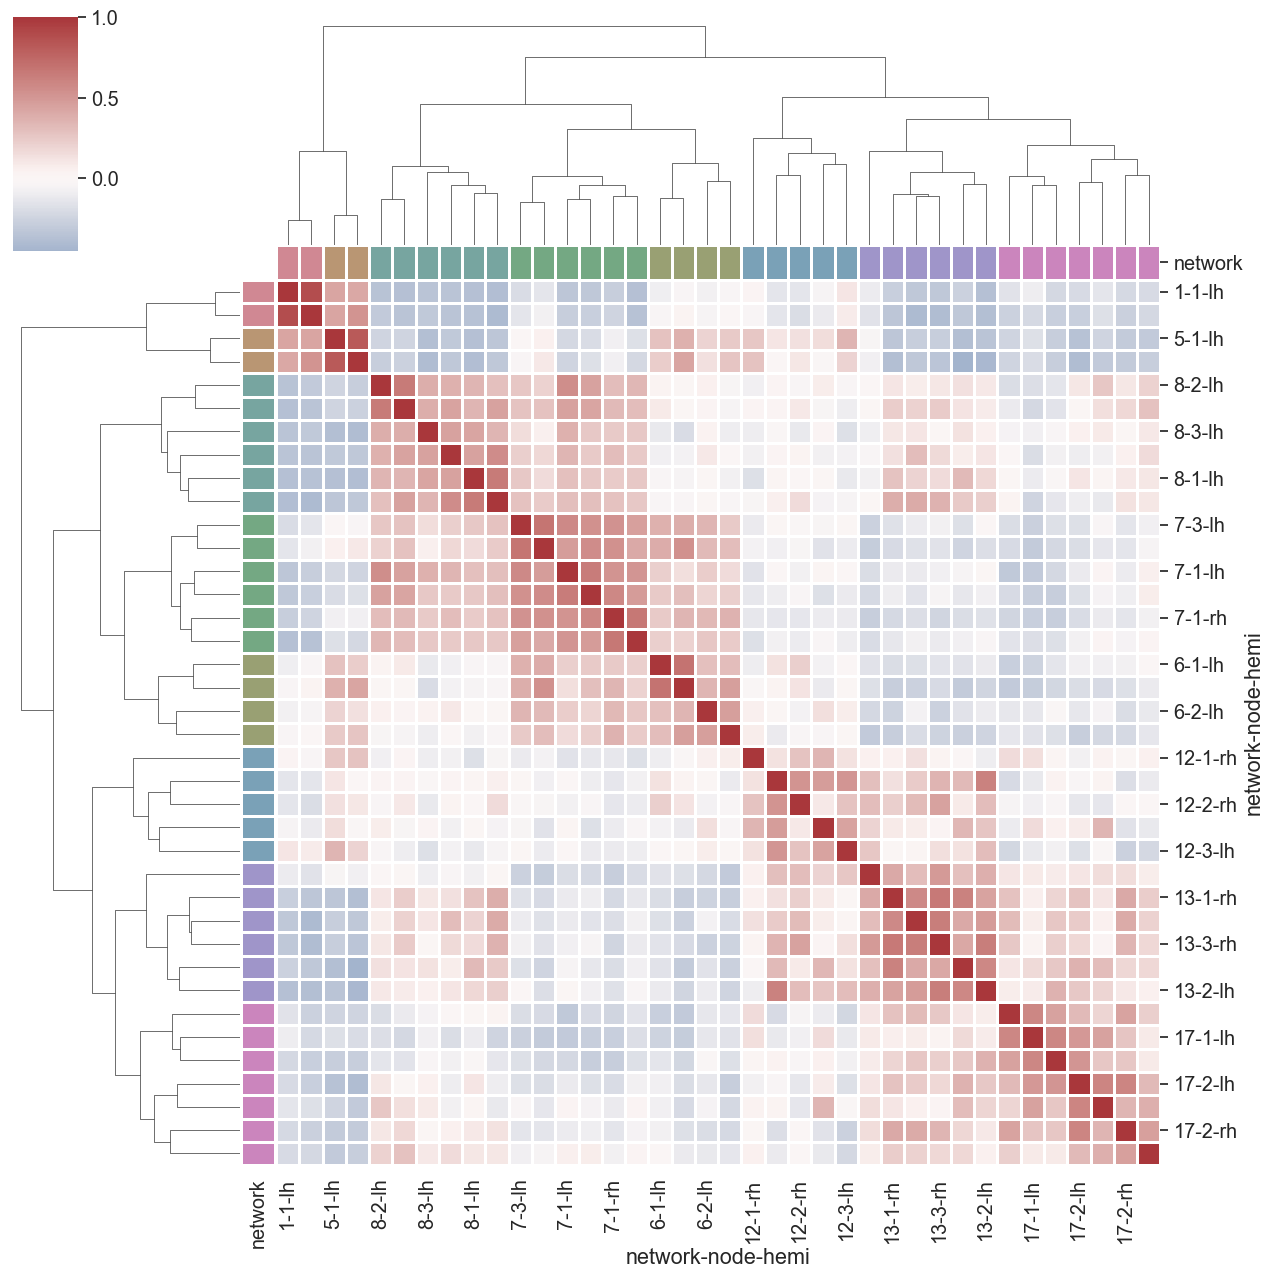

In [85]:
sns.clustermap(data.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13));


Решение задач
--
1. Рассмотрим датасет "Ирисы Фишера". Этот датасет содержит информацию о 150 экземплярах ириса, разделенных на три вида: Setosa, Versicolor и Virginica. Для каждого экземпляра ириса зарегистрированы четыре атрибута: длина и ширина чашелистика, длина и ширина лепестка. Сравните распределение всех четырех характеристик (длина и ширина чашелистика, длина и ширина лепестка) между разными видами ирисов с использованием violinplot.


In [92]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:

iris_melted = iris.melt(id_vars="species")
iris_melted.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


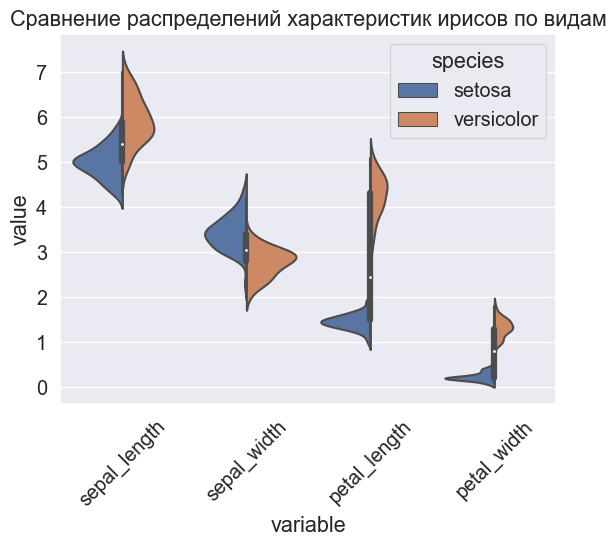

In [102]:


sns.violinplot(x="variable", y="value", hue="species", data=iris_melted[iris_melted['species'].isin(iris_melted['species'].unique()[:2])], split=True)
plt.title("Сравнение распределений характеристик ирисов по видам")
plt.xticks(rotation=45)
plt.show()


array(['setosa', 'versicolor'], dtype=object)

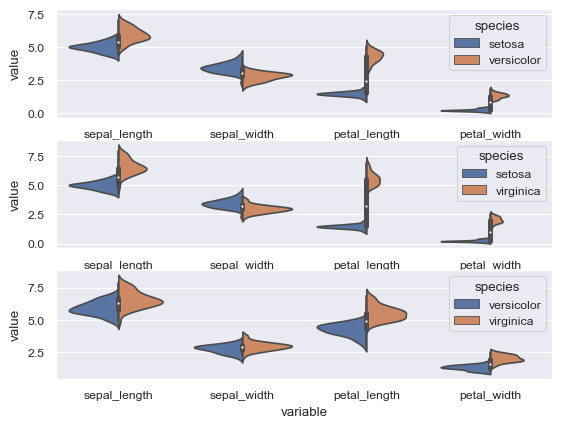

In [109]:
sns.set_context('paper')
sp = iris_melted.species.unique()
k = 0
for i in range(len(sp)):
    for j in range(i+1, len(sp)):
        k = k + 1
        plt.subplot(len(sp), 1, k)
        sns.violinplot(
                      x= 'variable',
                      y = 'value',
                      data = iris_melted[iris_melted['species'].isin([sp[i] ,sp[j]])], split=True,
                      hue = 'species')
plt.show()
        

2.Сравните распределение длины лепестков между различными видами ирисов с помощью boxplot


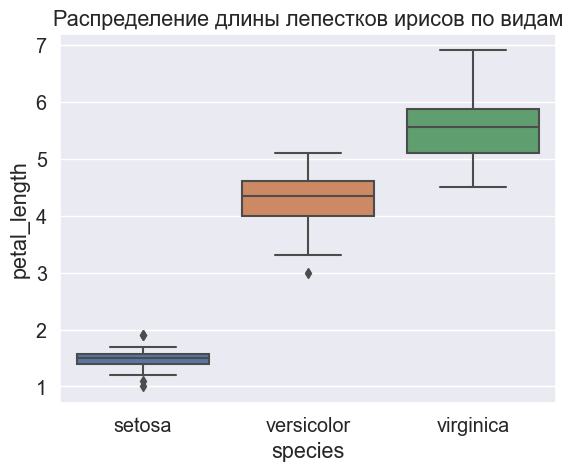

In [93]:
sns.boxplot(x="species", y="petal_length", data=iris)
plt.title("Распределение длины лепестков ирисов по видам")
plt.show()


3. Визуализируйте корреляцию между длиной и шириной чашелистика ирисов.


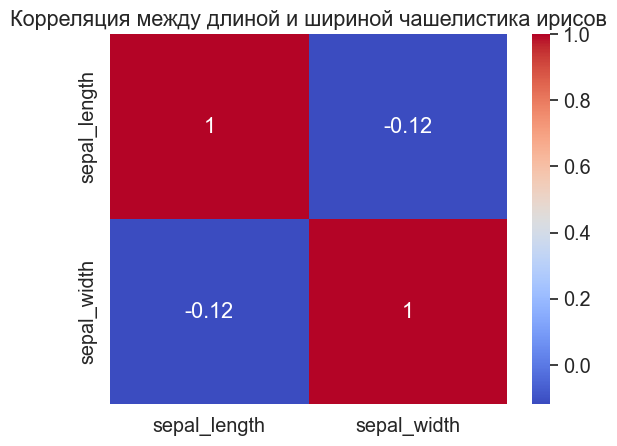

In [94]:
corr = iris[['sepal_length', 'sepal_width']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляция между длиной и шириной чашелистика ирисов")
plt.show()


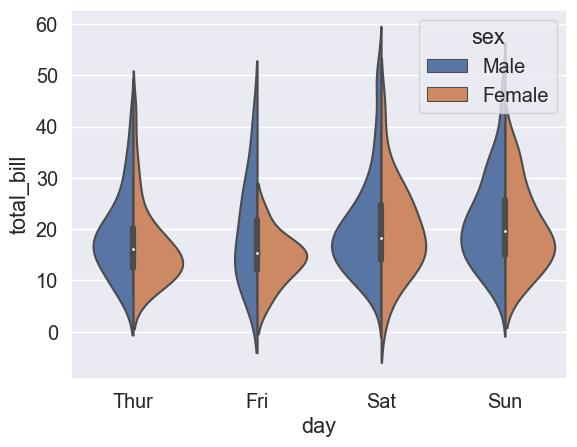

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = sns.load_dataset("tips")
data = data[data['sex'].isin(['Male', 'Female'])]  # Ensure only two levels for 'hue'

# Violin plot with split=True
sns.violinplot(x="day", y="total_bill", hue="sex", data=data, split=True)
plt.show()
